# Summary

```Objective```

todo

```Methods```

todo

```Results```

todo

# Config

# Libs

In [1]:
import numpy as np
import torch
import torchio as tio
import torchio.transforms as transforms
import matplotlib.pyplot as plt
import h5py
import nibabel as nib

def show_img(img):
    plt.figure(dpi=150)
    im = plt.imshow(img, cmap='gray')
    # cbar = plt.colorbar(im, shrink=0.5)
    im.set_clim(vmin=0, vmax=2000)
    plt.xticks([])
    plt.yticks([])
    plt.show()

c:\Users\NUGURI\anaconda3\envs\misalign\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


val 3T1 size:  (256, 304, 308)
val 7T1 size:  (256, 304, 308)


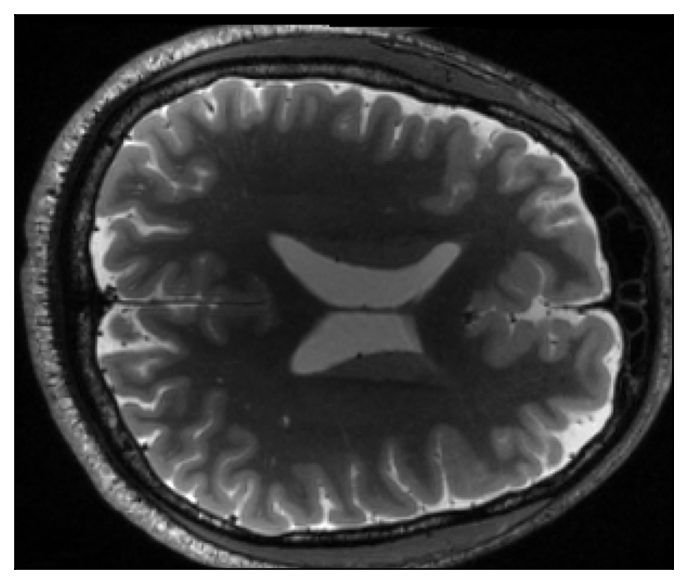

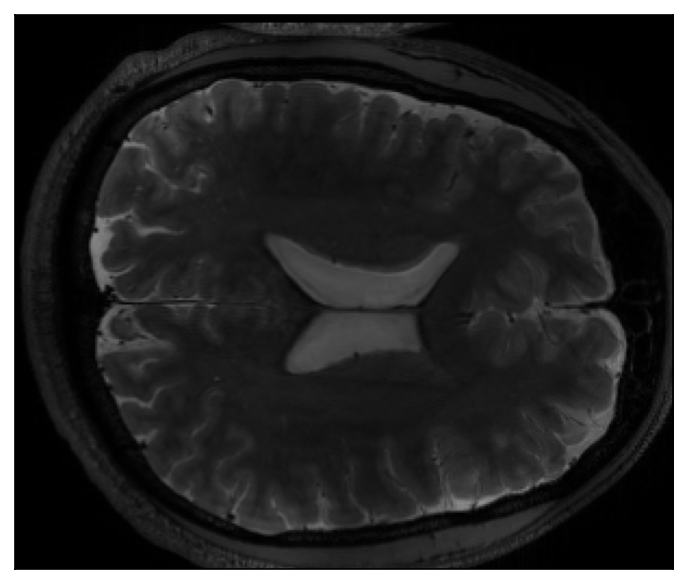

In [2]:
nii_path_3T = 'F:/KIST/CBM_2023/dataset/3T 7T/dataset/dataset/Aligned/sub-10/ses-1/anat/sub-10_ses-1_T2w_defaced_registered.nii.gz'
nii_path_7T = 'F:/KIST/CBM_2023/dataset/3T 7T/dataset/dataset/Aligned/sub-10/ses-2/anat/sub-10_ses-2_T2w_defaced_registered.nii.gz'
raw_3T = nib.load(nii_path_3T)
raw_7T = nib.load(nii_path_7T)
raw_3T_data = raw_3T.get_fdata()
raw_7T_data = raw_7T.get_fdata()

print('val 3T1 size: ', raw_3T_data.shape)
print('val 7T1 size: ', raw_7T_data.shape)

zz =200
show_img(raw_3T_data[:,:,zz])
show_img(raw_7T_data[:,:,zz])

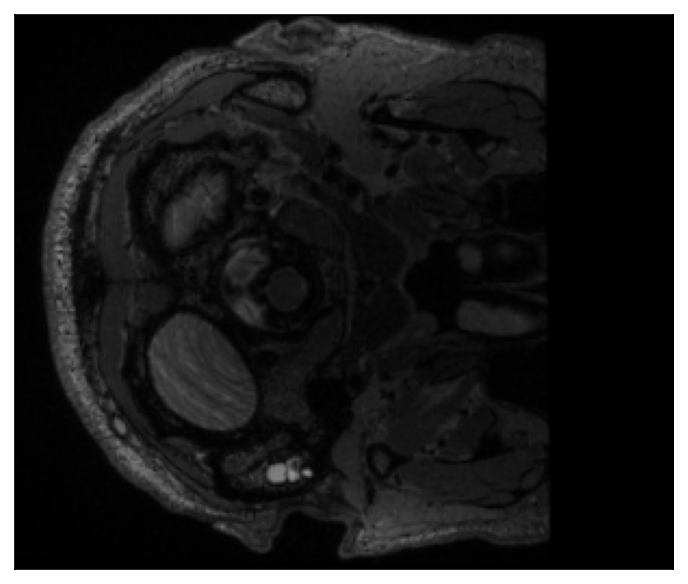

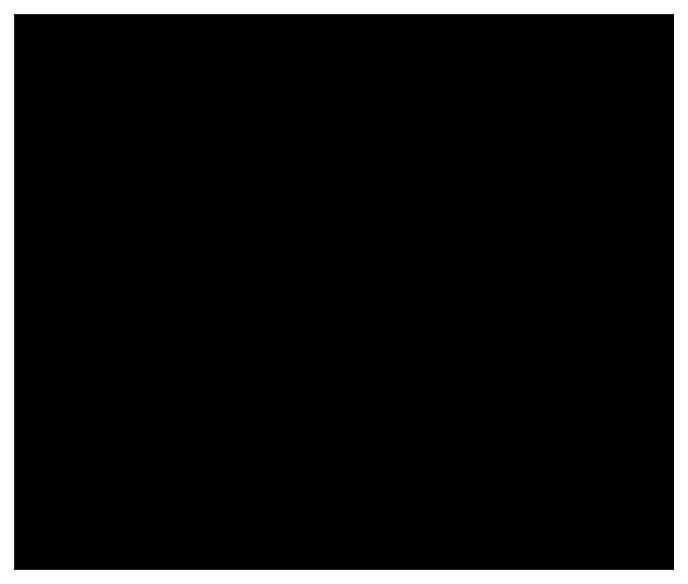

split 3T size:  (256, 304, 200)
split 7T size:  (256, 304, 200)


In [3]:
z_end = 275-1
z_start = z_end-200

split_3T_data = raw_3T_data[:,:,z_start:z_end]
split_7T_data = raw_7T_data[:,:,z_start:z_end]

zz =0
show_img(split_3T_data[:,:,zz])
show_img(split_7T_data[:,:,zz])

print('split 3T size: ', split_3T_data.shape)
print('split 7T size: ', split_7T_data.shape)

In [5]:
# 데이터를 NIfTI 형식으로 저장
nifti_img = nib.Nifti1Image(split_7T_data, affine=np.eye(4))
nib.save(nifti_img, 'C:/Users/NUGURI/Workspace/2023.08.22_misalign_CBM/data/MR_3T2_7T2_s/splited_data/sub10_7T_T2.nii.gz')